In [1]:
import numpy as np

seed=1234
np.random.seed(seed)

In [6]:
import pandas as pd

# 데이터 경로 지정 및 읽어오기
data_path='Invistico_Airline.csv'
airplane=pd.read_csv(data_path)

#데이터 꼴 확인
airplane.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
#기본 정보
print('#'*20, '기본 정보','#'*20)
airplane.info()#info() 안에서 자동으로 print를 진행
#기초 통계량
summary_statistics = airplane.describe(include='all')
print('#'*20,'기초 통계량','#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int6

In [9]:
y_column = ['satisfaction']
numeric_columns = ['Age', 'Flight Distance',
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_columns = ['Seat comfort', 'Departure/Arrival time convenient',
                   'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment',
                   'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service',
                   'Baggage handling', 'Checkin service',
                   'Cleanliness', 'Online boarding']
category_columns = ['Gender', 'Customer Type',
                    'Type of Travel', 'Class']

수치형 데이터 분석

분포 확인

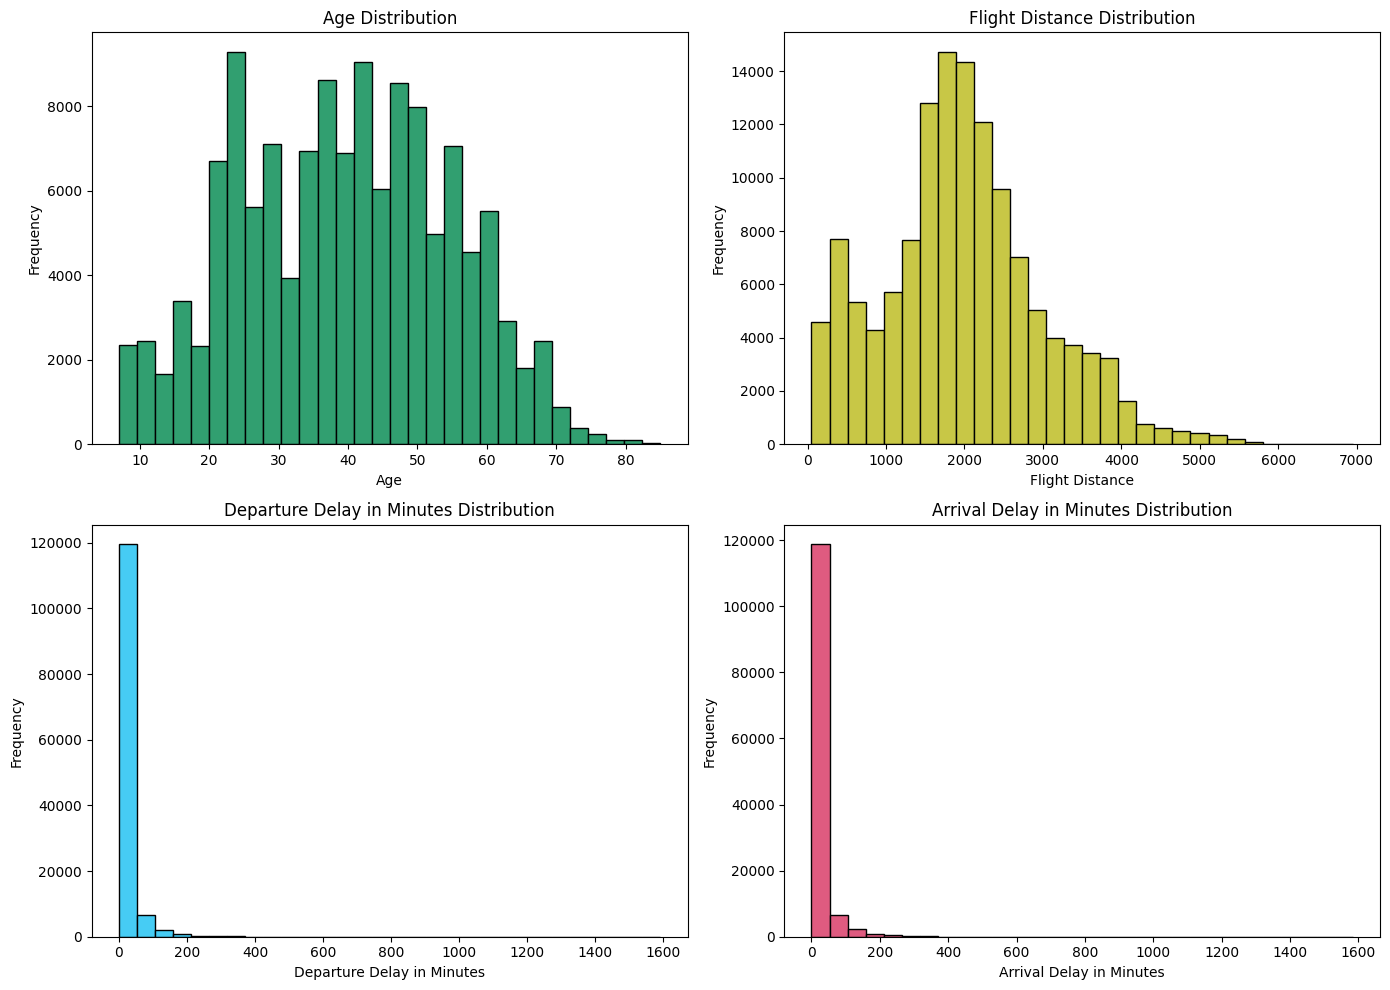

In [15]:
numeric_data=airplane[numeric_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns):
  col=(np.random.random(),np.random.random(),np.random.random())

  plt.subplot(2,2,idx+1)
  plt.hist(numeric_data[numeric],bins=30,color=col,edgecolor='black')
  plt.title(f'{numeric} Distribution')
  plt.xlabel(numeric)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


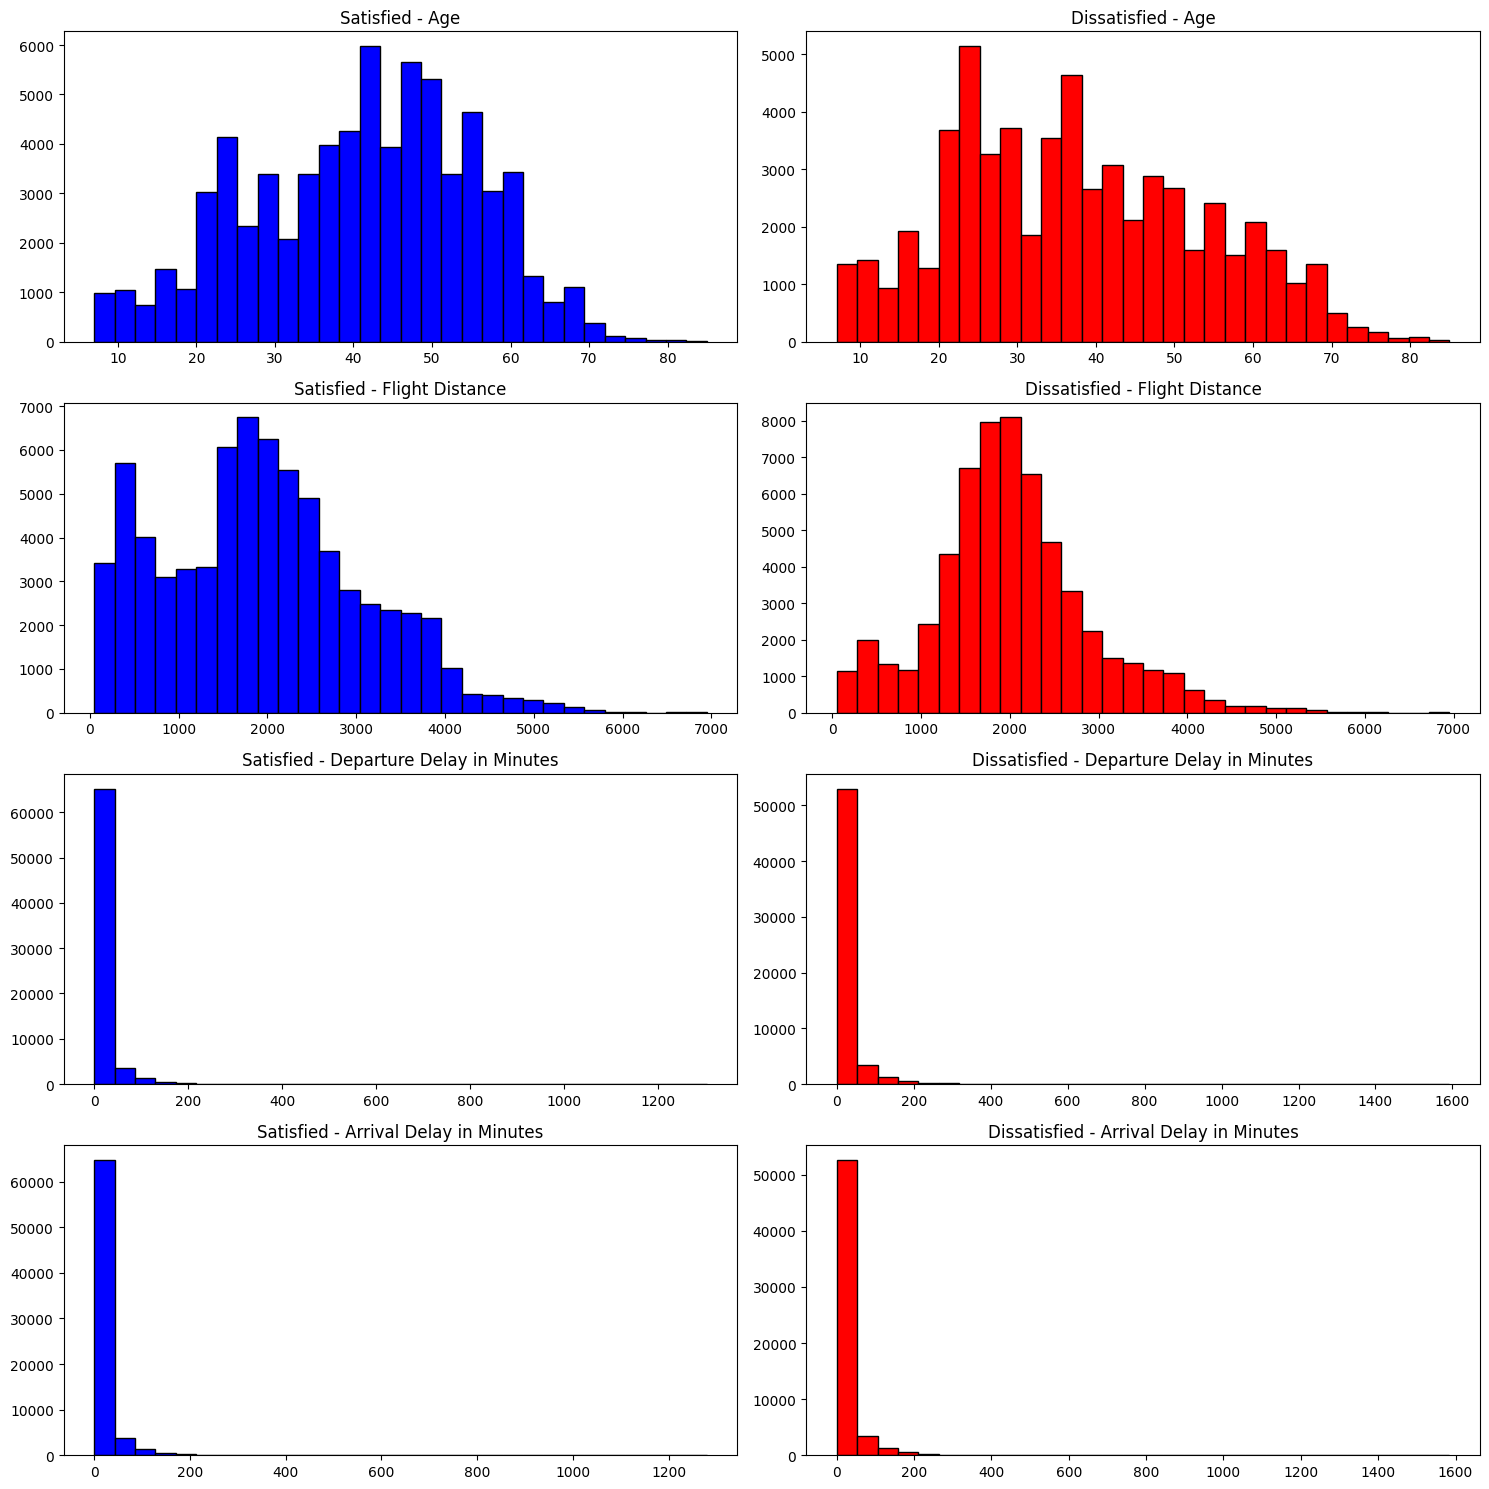

In [16]:
satisfied=airplane[airplane['satisfaction']=='satisfied']
dissatisfied=airplane[airplane['satisfaction']=='dissatisfied']

plt.figure(figsize=(15,15))

for idx,column in enumerate(numeric_columns):
  plt.subplot(len(numeric_columns),2,2*idx+1)
  plt.hist(satisfied[column],color='blue',label='Satisfied',bins=30,edgecolor='black')
  plt.title(f'Satisfied - {column}')

  plt.subplot(len(numeric_columns),2,2*idx+2)
  plt.hist(dissatisfied[column],color='red',label='Dissatisfied',bins=30,edgecolor='black')
  plt.title(f'Dissatisfied - {column}')

plt.tight_layout()
plt.show()